In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
trd_df=pd.read_csv('training_set.csv')
tsd_df=pd.read_csv('testing_set.csv')

In [3]:
trd_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N


In [4]:
tsd_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


# Profilling

In [5]:
trd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [6]:
trd=trd_df.drop('Loan_ID',axis=1)
tsd=tsd_df.drop('Loan_ID',axis=1)

In [7]:
cat=[]
con=[]
for i in trd.columns:
    if(trd[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)           

In [8]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [9]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [10]:
trd[cat].nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

In [11]:
trd[con].nunique()
#Here we will consider the coloumns which have unique values less than 10 as categorical coloumn

ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
dtype: int64

In [12]:
con.remove('Credit_History')
cat.append('Credit_History')

# Missing Values

In [13]:
for i in con:
    x=trd[i].mean()
    trd[i]=trd[i].fillna(x)
    tsd[i]=tsd[i].fillna(x)

In [14]:
tsd.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [15]:
for i in cat:
    x=trd[i].mode()[0]
    trd[i]=trd[i].fillna(x)
    if(i!='Loan_Status'):
        tsd[i]=tsd[i].fillna(x)

# Outliers

In [16]:
#Outlier treatment in training set

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
array=ss.fit_transform(trd[con])
df=pd.DataFrame(array,columns=con)

In [17]:
out=[]
for i in con:
    out=out+list(df[(df[i]>3)|(df[i]<-3)].index)

In [18]:
from numpy import unique
outliers=list(unique(out))

In [19]:
#Dropping the rows which have ouliers

trd=trd.drop(index=outliers,axis=0)

In [20]:
trd.shape

(577, 12)

In [21]:
trd.index=range(0,577)

# EDA

In [22]:
def ANOVA(df,cat,con):
    from statsmodels.formula.api import ols
    eqn = str(con) + " ~ " + str(cat)
    model = ols(eqn,df).fit()
    from statsmodels.stats.anova import anova_lm
    Q = anova_lm(model)
    return round(Q.iloc[0:1,4:5].values[0][0],5)

def chisq(df,cat1,cat2):
    import pandas as pd
    from scipy.stats import chi2_contingency
    ct = pd.crosstab(df[cat1],df[cat2])
    a,b,c,d = chi2_contingency(ct)
    return round(b,5)

In [23]:
for i in con:
    pval = ANOVA(trd,'Loan_Status',i)
    print("Loan_Status vs",i,"pval =",pval)

Loan_Status vs ApplicantIncome pval = 0.89434
Loan_Status vs CoapplicantIncome pval = 0.28206
Loan_Status vs LoanAmount pval = 0.3975
Loan_Status vs Loan_Amount_Term pval = 0.66362


In [24]:
for i in cat:
    pval = chisq(trd,'Loan_Status',i)
    print("Loan_Status vs",i,"pval =",pval)

Loan_Status vs Gender pval = 0.76236
Loan_Status vs Married pval = 0.04094
Loan_Status vs Dependents pval = 0.58265
Loan_Status vs Education pval = 0.03415
Loan_Status vs Self_Employed pval = 0.61581
Loan_Status vs Property_Area pval = 0.00232
Loan_Status vs Loan_Status pval = 0.0
Loan_Status vs Credit_History pval = 0.0


If we want to create linear model then we will consider the coloumns which are having pval less than 0.05 or close to pval

# Logistic Regression

In [25]:
x=trd[['CoapplicantIncome','Married','Education','Property_Area','Credit_History']]
y=trd[['Loan_Status']]

In [26]:
x=pd.get_dummies(x)

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
array=ss.fit_transform(x)
x=pd.DataFrame(array,columns=x.columns)

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21)

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain,ytrain)

tr_acc=lr.score(xtrain,ytrain)
ts_acc=lr.score(xtest,ytest)
tr_acc,ts_acc

(0.8112798264642083, 0.8448275862068966)

With all x coloumns for decision tree,random forest etc

In [30]:
x=trd.drop(['Loan_Status'],axis=1)

In [31]:
x=pd.get_dummies(x)

In [32]:
ss=StandardScaler()
array=ss.fit_transform(x)
x=pd.DataFrame(array,columns=x.columns)

In [33]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21)

In [34]:
def modeller(mo):
    model=mo.fit(xtrain,ytrain)
    tr_acc=round(model.score(xtrain,ytrain),2)
    ts_acc=round(model.score(xtest,ytest),2)
    return tr_acc,ts_acc

# DecisionTree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=11)
modeller(dtc)

(1.0, 0.71)

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
dt_model  = DecisionTreeClassifier(random_state=101)

hyp = {'max_depth':np.arange(2,10),'min_samples_split':np.arange(2,20),
        'min_samples_leaf':np.arange(1,15)}

rscv_dt_model = RandomizedSearchCV(dt_model,hyp,cv=9)

rscv_dt_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=9, estimator=DecisionTreeClassifier(random_state=101),
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [38]:
rscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=4,
                       random_state=101)

In [39]:
dtc=rscv_dt_model.best_estimator_
modeller(dtc)

(0.81, 0.84)

# RandomForest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)
modeller(rfc)

(1.0, 0.79)

In [41]:
rf_model  = RandomForestClassifier(random_state=101)

hyp = {'max_depth':np.arange(2,10),'min_samples_split':np.arange(2,20),
        'min_samples_leaf':np.arange(1,15)}

rscv_rf_model = RandomizedSearchCV(rf_model,hyp,cv=9)

rscv_rf_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(random_state=101),
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [42]:
rscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_split=8, random_state=101)

In [43]:
rfc=rscv_rf_model.best_estimator_
modeller(rfc)

(0.82, 0.84)

<AxesSubplot:>

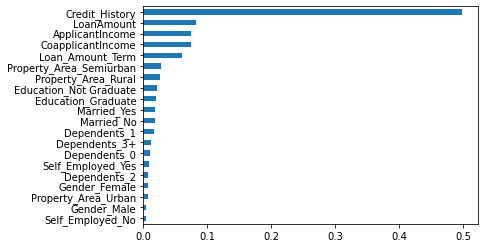

In [44]:
s1 = pd.Series(rfc.feature_importances_,index=x.columns)
s1.sort_values().plot(kind= 'barh')

# AdaBoost Classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=101)
modeller(abc)

(0.86, 0.81)

<AxesSubplot:>

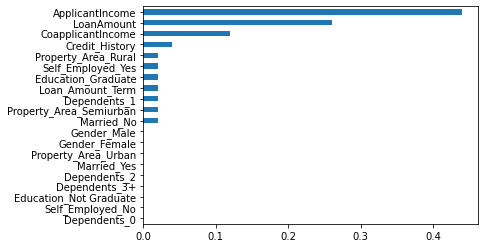

In [46]:
s1 = pd.Series(abc.feature_importances_,index=x.columns)
s1.sort_values().plot(kind= 'barh')

In [47]:
tr = []
ts = []
for i in range(2,100,1):
    abc = AdaBoostClassifier(n_estimators=i)
    t1,t2 = modeller(abc)
    tr.append(t1)
    ts.append(t2)

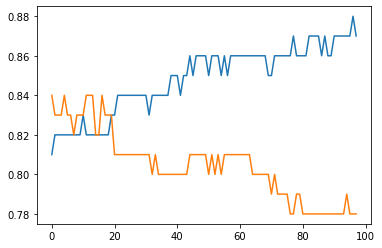

In [48]:
plt.plot(tr)
plt.plot(ts)

In [49]:
abc = AdaBoostClassifier(n_estimators=12)
modeller(abc)

(0.83, 0.83)

# KNeighbors Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
modeller(knc)

(0.8, 0.73)

In [51]:
tr = []
ts = []
for i in range(2,100,1):
    from sklearn.neighbors import KNeighborsClassifier
    knr = KNeighborsClassifier(n_neighbors=i)
    t1,t2 = modeller(knr)
    tr.append(t1)
    ts.append(t2)

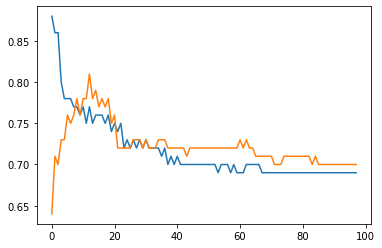

In [52]:
plt.plot(tr)
plt.plot(ts)

In [53]:
knc = KNeighborsClassifier(n_neighbors=11)
modeller(knc)

(0.76, 0.76)

# Train the model with entire Data

Here we will consider Adaboost as final model 

In [54]:
abc = AdaBoostClassifier(n_estimators=12)
model=abc.fit(x,y)

# Data preparation for testing set

In [55]:
tsd=pd.get_dummies(tsd) 

In [56]:
array=ss.transform(tsd)
x2=pd.DataFrame(array,columns=tsd.columns)

In [57]:
len(x.columns)

20

In [58]:
len(x2.columns)

20

# Predictions

In [59]:
pred=model.predict(x2)

# 1.)Check eligibility of the Customer given the inputs described above.(Classification)

In [60]:
loan_status=pd.DataFrame(pred,columns=['Loan_Status'])

submit=pd.concat([tsd_df['Loan_ID'],loan_status],axis=1)
submit.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [61]:
submit=pd.concat([tsd_df,loan_status],axis=1)
submit

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [62]:
# saving the dataframe
submit.to_csv('test_Pred.csv',index=False)

# 2.)Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

In [63]:
from sklearn.cluster import KMeans

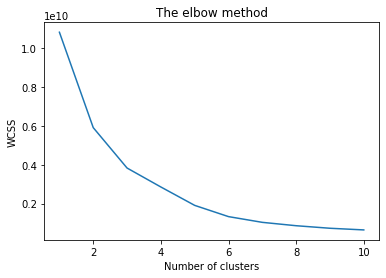

In [64]:
x = tsd.iloc[:,:].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [65]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

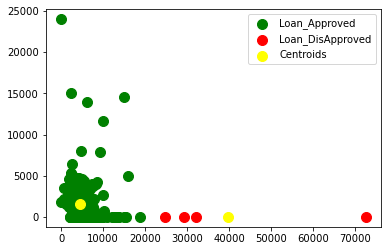

In [66]:
# Visualising the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Loan_Approved')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Loan_DisApproved')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()